In [239]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

import figurefirst as fifi

In [240]:
# to generate this dataset from scratch, run python ./decision_strategies.py
df = pandas.read_hdf('realistic_lambdas_TGUD_iTGUD_GPL_iGPL.hdf')

In [242]:
fififig = 'figures/foraging_fig_4_revision_v2.svg'

In [388]:
def plot_result(model1, model2, axname, 
                pfood=0.8,
                fififig=None, color='Blues', yticks=[-0.25, 0, 0.25, 0.5]):

    if fififig is not None:
        layout = fifi.svg_to_axes.FigureLayout(fififig, autogenlayers=True, 
                                               make_mplfigures=True, hide_layers=[])
        ax = layout.axes[(axname, axname)]
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
    pfoodsteps = df.pfoodstep.unique()
    n = -0.5

    ymin = 0
    ymax = 0
    for pfoodstep in pfoodsteps:

        tgud = df.query("pfood == "+str(pfood)+" and pfoodstep == "+str(pfoodstep)+" and model == '"+model1+"'")
        itgud = df.query("pfood == "+str(pfood)+" and pfoodstep == "+str(pfoodstep)+" and model == '"+model2+"'")

        n += 1.5
        x = np.log10(tgud.interval.values) + n*7
        
        MR = 1.
        tgud_search_energy = tgud.mean_search_time_patch.values + tgud.mean_search_time_flight.values*MR
        itgud_search_energy = itgud.mean_search_time_patch.values + itgud.mean_search_time_flight.values*MR
        diff_1 = tgud_search_energy - itgud_search_energy
        diff_1 /= tgud_search_energy
        
        MR = 10.
        tgud_search_energy = tgud.mean_search_time_patch.values + tgud.mean_search_time_flight.values*MR
        itgud_search_energy = itgud.mean_search_time_patch.values + itgud.mean_search_time_flight.values*MR
        diff_10 = tgud_search_energy - itgud_search_energy
        diff_10 /= tgud_search_energy
        
        for i in range(len(x)):
            if np.abs(diff_10[i]-diff_1[i]) < 0.02:
                mean_diff = np.mean([diff_1[i], diff_10[i]])
                diff_1[i] = mean_diff-0.01
                diff_10[i] = mean_diff+0.01
        
        for i in range(len(x)):
            m = np.array([[1,1],[10,10]])
            if diff_1[i] > diff_10[i]:
                m = m[::-1,:]
                
            if 1:
                bottom = np.min([diff_1[i], diff_10[i]])
                top = np.max([diff_1[i], diff_10[i]])
                ax.imshow(m, cmap=color, 
                          extent=[x[i]-0.5, x[i]+0.5, bottom, top],
                          origin='lower',
                          interpolation='bicubic',
                          vmax=10,
                          vmin=-3)
                
                if top > ymax:
                    ymax = top
                if bottom < ymin:
                    ymin = bottom

            if 0:
                ax.fill_between([x[i]-0.5, x[i]+0.5], diff_1[i], diff_10[i], 
                                facecolor=color, edgecolor='none', alpha=0.35)
            #ax.hlines(diff_1[i], x[i]-0.5, x[i]+0.5, color='red')
        
        #ax.hlines( np.log(np.mean(diff)), x[0], x[-1], color='blue')
        #ax.scatter(x, np.log(diff), c='blue')
        #ax.scatter(x, -np.log(-diff), c='blue')
        #ax.scatter(x, diff/tgud_search_energy, c='blue')
        
    ax.set_aspect('auto')

    ax.hlines(0, 0, max(x)+5, linestyles='--', linewidths=0.5)

    #yticks = [-0.25, 0, 0.25, 0.5]
    yticklabels = []
    for ytick in yticks:
        if ytick > 0:
            yticklabel = '$+' + str(int(100*ytick)) + '\%$'
        else:
            yticklabel = '$' + str(int(100*ytick)) + '\%$'
        yticklabels.append(yticklabel) #'$-25\%$', '$0\%$', '$+25\%$', '$+50\%$']

    fifi.mpl_functions.adjust_spines(ax, ['left'], 
                                     yticks=yticks, 
                                     linewidth=0.5, tick_length=2.5, 
                                     spine_locations={'left': 2.5, 'bottom': 2.5})
    ax.set_yticklabels(yticklabels)
    ax.minorticks_off()

    ax.set_xlim(4, max(x)+2)
    #ax.set_ylim(ymin, ymax)
    #print(ymin, ymax)
    
    if fififig is not None:
        fifi.mpl_functions.set_fontsize(ax.figure, 6)
        layout.append_figure_to_layer(layout.figures[axname], axname, cleartarget=True)
        layout.write_svg(fififig)

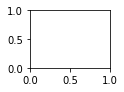

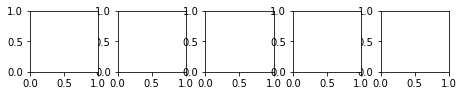

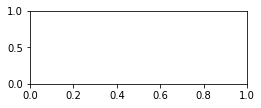

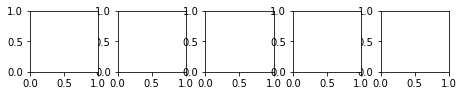

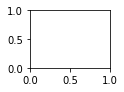

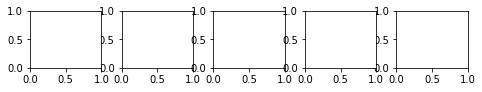

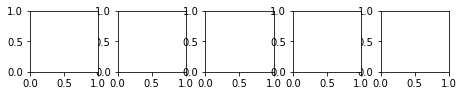

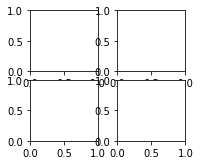

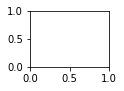

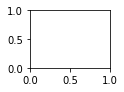

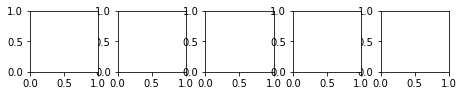

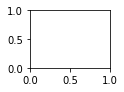

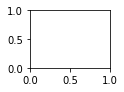

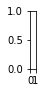

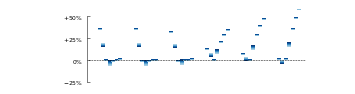

In [383]:
plot_result('TGUD', 'iTGUD', 'tgud_vs_itgud', fififig)

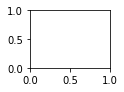

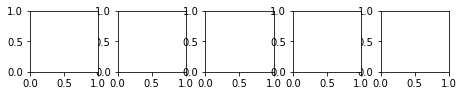

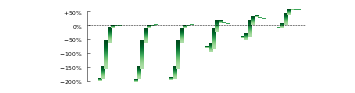

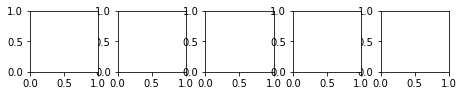

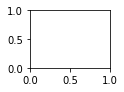

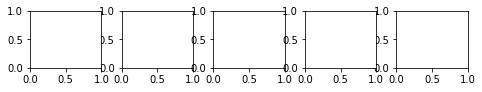

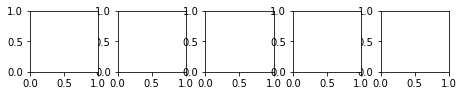

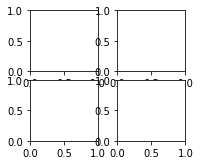

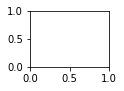

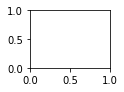

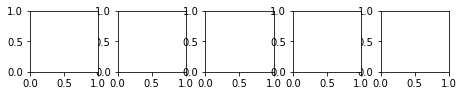

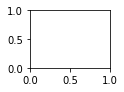

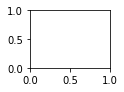

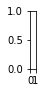

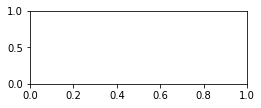

In [384]:
plot_result('iTGUD', 'iGPL', 'itgud_vs_igpl', fififig, color='Greens', yticks=[-2, -1.5, -1, -0.5, 0, 0.5])

# Supplement

In [386]:
fififig = 'supplemental_figures/foraging_fig_4_revision_supplement.svg'

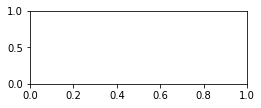

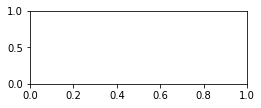

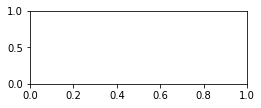

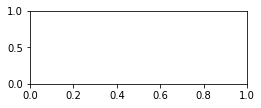

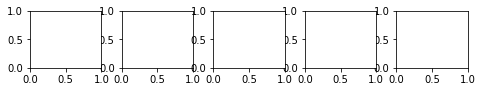

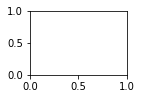

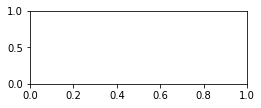

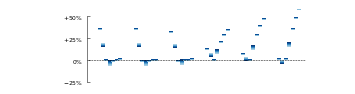

In [389]:
plot_result('TGUD', 'iTGUD', 'tgud_vs_itgud', fififig=fififig, pfood=0.8)

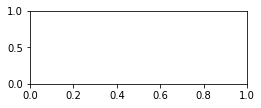

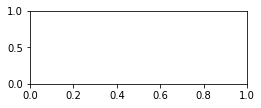

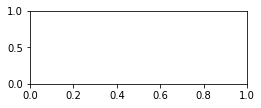

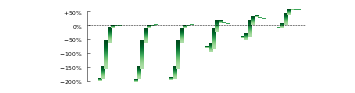

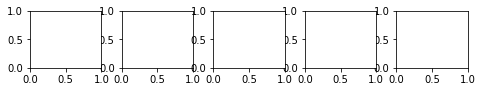

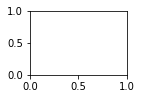

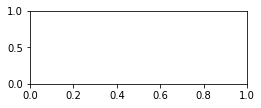

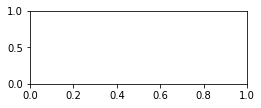

In [390]:
plot_result('iTGUD', 'iGPL', 'itgud_vs_igpl', fififig=fififig, pfood=0.8, 
            color='Greens', yticks=[-2, -1.5, -1, -0.5, 0, 0.5])

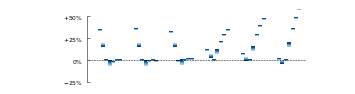

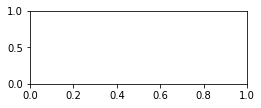

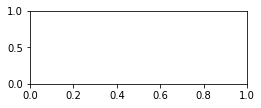

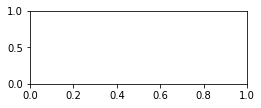

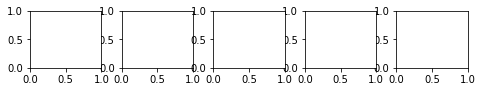

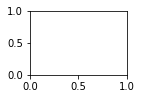

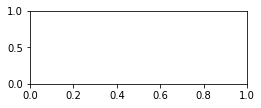

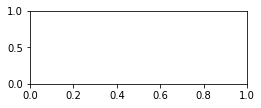

In [391]:
plot_result('TGUD', 'iTGUD', 'tgud_vs_itgud_20', fififig=fififig, pfood=0.2)

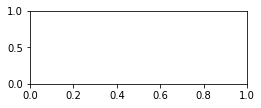

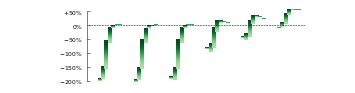

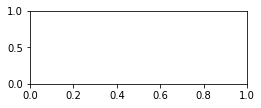

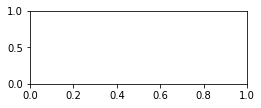

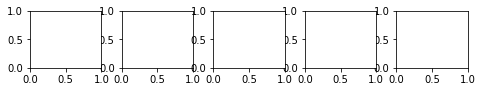

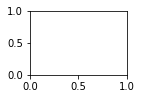

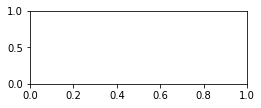

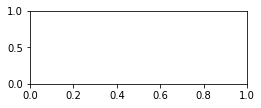

In [392]:
plot_result('iTGUD', 'iGPL', 'itgud_vs_igpl_20', fififig=fififig, pfood=0.2, 
            color='Greens', yticks=[-2, -1.5, -1, -0.5, 0, 0.5])

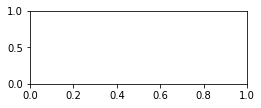

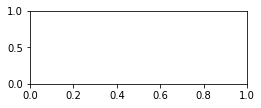

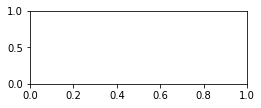

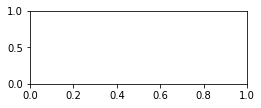

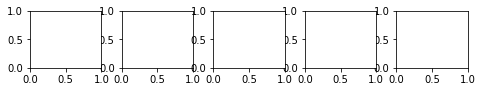

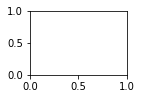

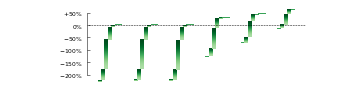

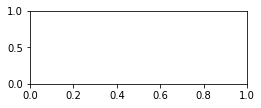

In [402]:
plot_result('TGUD', 'GPL', 'tgud_vs_gpl_20', fififig=fififig, pfood=0.2, 
            color='Greens', yticks=[-2, -1.5, -1, -0.5, 0, 0.5])

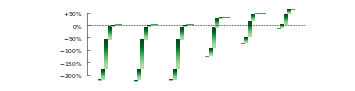

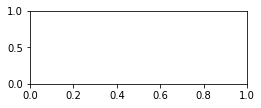

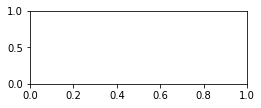

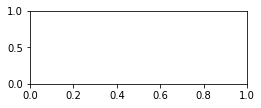

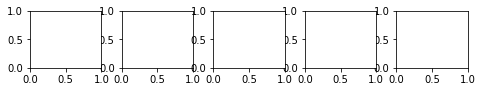

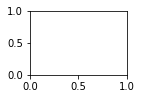

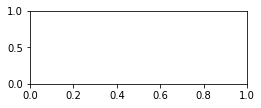

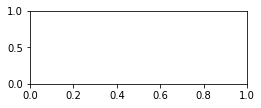

In [403]:
plot_result('TGUD', 'GPL', 'tgud_vs_gpl_80', fififig=fififig, pfood=0.8, 
            color='Greens', yticks=[-2, -1.5, -1, -0.5, 0, 0.5])